In [1]:
from nd2reader import ND2Reader
import matplotlib.pyplot as plt

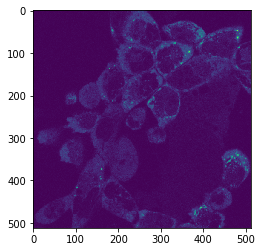

In [3]:
with ND2Reader('./20180831_A1_5.nd2') as images:
  plt.imshow(images[2])

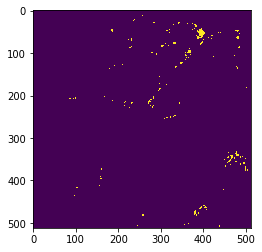

In [5]:
with ND2Reader('./20180831_A1_5.nd2') as images:
    plt.imshow(images[2]>600)

In [13]:
images = ND2Reader('./20180831_A1_5.nd2')
img = images[2]

def t(threshold_value):
    t_img = img > threshold_value
    plt.imshow(t_img)
    plt.show()

slider = widgets.IntSlider(min=0, max=1000, step=10, value=0)
interact(t, threshold_value=slider)

interactive(children=(IntSlider(value=0, description='threshold_value', max=1000, step=10), Output()), _dom_cl…

<function __main__.t(threshold_value)>

In [14]:
slider.value

520

That was easy. Now try to get those individual particles and the surrounding pixels?

Frame([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)
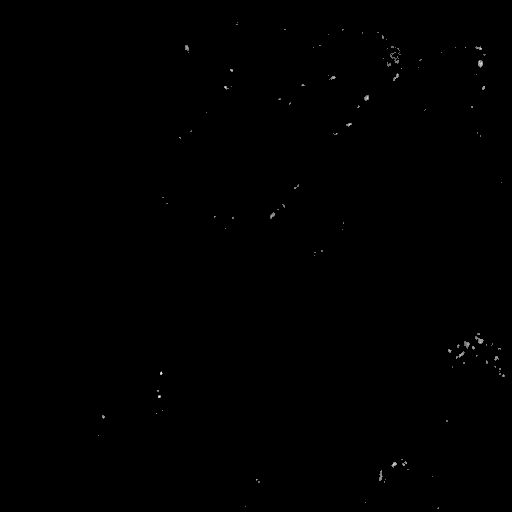

In [17]:
(img > 820)*img

In [33]:
from scipy import ndimage as ndi
labeled_sg, _ = ndi.label(img>820)

In [35]:
labeled_sg.shape

(512, 512)

In [36]:
_

121

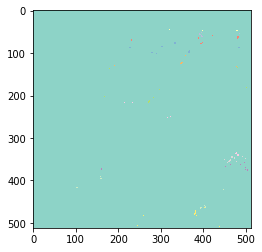

In [40]:
plt.imshow(labeled_sg,cmap='Set3')

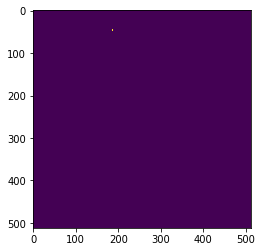

In [54]:
plt.imshow(labeled_sg==10)

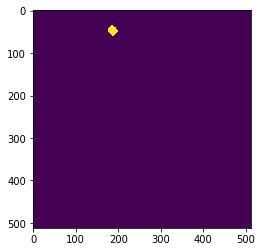

In [47]:
plt.imshow(ndi.morphology.binary_dilation(labeled_sg==10,iterations=10))

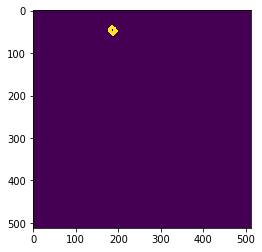

In [50]:
import numpy as np
dilated = ndi.morphology.binary_dilation(labeled_sg==10,iterations=10)
outline = np.logical_xor(dilated,labeled_sg==10)
plt.imshow(outline)

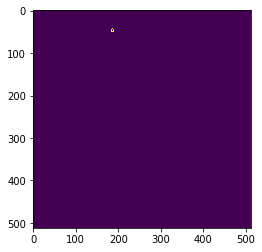

In [55]:
import numpy as np
dilated = ndi.morphology.binary_dilation(labeled_sg==10,iterations=2)
outline = np.logical_xor(dilated,labeled_sg==10)
plt.imshow(outline)

cool. now figure out how to mask the original image and compute the average values.

In [65]:
np.mean(img*(labeled_sg==10))

0.08173751831054688

In [68]:
a = np.ma.array(img, mask=(labeled_sg!=10))

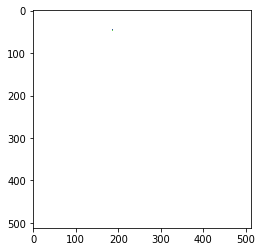

In [70]:
plt.imshow(a)

In [72]:
np.ma.median(a)

1023.0

not too bad. now put all together and plot the ratio.